# Exercise 02 Regression I - Simple Linear Regression

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

## Part 1. Simple linear regression with ordinary least squares approach

This part will build a simple linear regression model with a toy dataset. The parameters (slope and y-intercept) will be estimated using the ordinary least squares approach. In this part, we will implement the ordinary least squares with only Python build-in math module, as well as the Pandas and NumPy library.

### Import libraries

In [241]:
# import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In this exercise, we will use a small standard dataset: the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Please download this dataset (.csv file) from Learn and load it use Pandas.

The diabetes dataset contains the diabetes data collected from 442 patients. There are ten features (the first 10 columns) in the dataset:
- age (age in years)
- sex
- bmi (body mass index)
- bp (average blood pressure)
- s1 (tc, total serum cholesterol)
- s2 (ldl, low-density lipoproteins)
- s3 (hdl, high-density lipoproteins)
- s4 (tch, total cholesterol / HDL)
- s5 (ltg, possibly log of serum triglycerides level)
- s6 (glu, blood sugar level)

The 11st column is the target variable, a quantitative measure of disease progression one year after baseline.

In [242]:
# load diabetes dataset
data_df = pd.read_csv('diabetes_dataset.csv')
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


### Explore the dataset

In this exercise, we want to build a simple linear regression model to predict the target variable (the quantitative measure of disease progression one year after baseline) for diabetes patients.

As we are using the simple linear regression as the regression algorithm, we need to select a single input variable from the 10 features. We can compare the correlations between different features and the target variable and select the feature with the strongest correlation as the input variable.

In [243]:
# calculate the correlation matrix for all columns in the dataset
corr = data_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


The last row of the correlation matrix shows the correlations between different features and the target variable. We can find that the third feature, bmi, has the strongest correlation.

We can also set different background colors for the cells according to the strength of the correlation to make it more intuitive.

In [244]:
# show correlation matrix with background colors
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


By comparint the correlations between different features and the target variable, we can select bmi as the input variable for our simple linear regression model.

### Split training and testing dataset

We need to split the dataset into two parts: the training and testing dataset. The training dataset will be used to train the simple linear regression model. The testing dataset will be used to evaluate the learned model.

The proportions of training and test sets can vary. Here we use 50% of the data as the training set and the rest data as the test set.

In [245]:
# get the total amount of the data
print("The dataset contains a total of {} instances of data.".format(len(data_df))) 

The dataset contains a total of 442 instances of data.


In [246]:
# split the training and testing set
train_ratio = 0.5
train_df = data_df[:int(train_ratio * len(data_df))]
test_df = data_df[int(train_ratio * len(data_df)):]

In [247]:
# extract the input and target variables
X_train, y_train = train_df['bmi'].values, train_df['target'].values
X_test, y_test = test_df['bmi'].values, test_df['target'].values

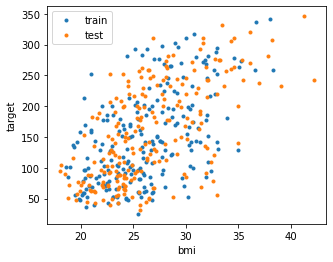

In [248]:
# visualize the training and testing set
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'train')
plt.plot(X_test, y_test, '.', label = 'test')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

### Ordinary least squares approach

We will use the ordinary least squares approach to estimate the slope and y-intercept parameter for the simple linear regression model.

$\hat{\beta}_1=\frac{S_{xy}}{S_{xx}}$

$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$

$\bar{x}=\frac{1}{n}\sum_{i=1}^nx_i$

$\bar{y}=\frac{1}{n}\sum_{i=1}^ny_i$

$S_{xx}=\frac{1}{n-1}\sum(x_i-\bar{x})^2$

$S_{xy}=\frac{1}{n-1}\sum(x_i-\bar{x})(y_i-\bar{y})$

In [249]:
# calculate the average of x and y
X_mean = X_train.mean()
y_mean = y_train.mean()

In [250]:
# calculate Sxy and Sxx
S_xx = np.square((X_train - X_mean)).sum() / (len(X_train) - 1)
S_xy = ((X_train - X_mean) * (y_train - y_mean)).sum() / (len(X_train) - 1)

In [251]:
# calculate the slope and y-intercept
slope = S_xy / S_xx
y_intercept = y_mean - slope * X_mean
print('The value of the slope is:', slope)
print('The value of the y-intercept is:', y_intercept)

The value of the slope is: 9.856096036094776
The value of the y-intercept is: -109.91157469331546


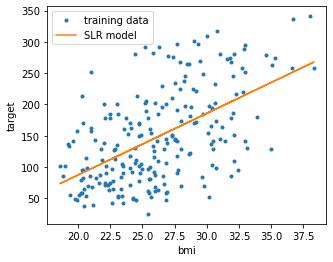

In [252]:
# visulalize the learned model
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, y_intercept + slope * X_train, '-', label = 'SLR model')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

### Evaluate the model with testing set

Once we obtained the slope and y-intercept of the simple linear regression model using the training dataset, we can evaluate the learned model using the testing dataset.

In [253]:
# use the learned model to make predictions on the test set
y_pred = y_intercept + slope * X_test

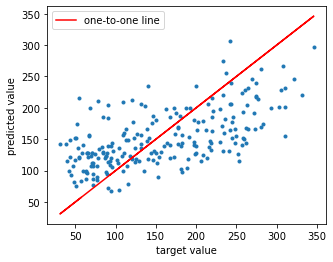

In [254]:
# visualize the predictions
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.')
plt.plot(y_test, y_test, 'r-', label = 'one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

As can be seen from the figure above, the scattered points are distributed near the one-to-one line. This indicates that the simple linear regression model can somehow predict the progression of diabetes by a patient's BMI.

Apart from the visualization, we can use different metrics to evaluate the model quantitatively. Here we will calculate the MSE (mean squared error), RMSE (root mean squared error) and $R^2$ (the coefficient of determination) to evaluate the regression model. 

In [255]:
# calculate mse
mse_test = np.square(y_test - y_pred).mean()
print("The MSE on the testing dataset is:", mse_test)

The MSE on the testing dataset is: 3878.729958668522


In [256]:
# calculate rmse
rmse_test = math.sqrt(mse_test)
print("The RMSE on the testing dataset is:", rmse_test)

The RMSE on the testing dataset is: 62.27945053280835


In [257]:
# claculate r^2
r2_test = 1 - np.square(y_test - y_pred).sum() / np.square(y_test - y_test.mean()).sum()
print("The R2 score on the testing dataset is:", r2_test)

The R2 score on the testing dataset is: 0.37410885207201106


## Part 2. Simple linear regression with `scikit-learn`

In this part, we will rebuild the above simple linear regression model using `scikit-learn`. More specifically, we will use `sklearn.linear_model.LinearRegression()` to fit a simple linear regression model on the same diabetes dataset.

`sklearn.linear_model.LinearRegression()` also use the ordinary least squares approach to estimate the slope and y-intercept. However, instead of using hand-coded programs, `scikit-learn` offers a lot of API to implement the machine learning process quickly and easily.

### Import libraries

In [258]:
# import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load dataset

Use `sklearn.datasets.load_diabetes` to load the same diabetes dataset.

In [259]:
# load diabetes dataset
feature_df, target_df = datasets.load_diabetes(return_X_y = True, as_frame = True, scaled = False)

In [260]:
# show the head of the feature_df
feature_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [261]:
# show the head of the target_df
target_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) of `sklearn.datasets.load_diabetes()`. Explain the meaning of the parameters: `return_X_y`, `as_frame`, `scaled`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

return_X_y: It will return the dataset in a specific format. It will return two objects, feature_df and target_df, representing the features (independent variables) and the target (dependent variable) of the dataset, respectively.

as_frame: The function will return the data in the form of pandas DataFrames.

scaled: The data should not be scaled or normalized.

### Split training and testing dataset

`scikit-learn` offers the `sklearn.model_selection.train_test_split()` function to split the dataset into the training and testing part.

In [262]:
# eliminate features other than bmi
feature_df = feature_df['bmi']

In [263]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(feature_df.values, target_df.values, train_size = 0.5, shuffle = False)

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) of `sklearn.model_selection.train_test_split()`. Explain the meaning of the parameters: `train_size`, `shuffle`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

- Train_size: specifies that you want to split the data so that 50% of the samples go into the training set.
- Shuffle: will not be randomly shuffled before splitting.

### Fit the model

Use `sklearn.linear_model.LinearRegression` to fit the simple linear regression model on the training dataset.

In [264]:
# fit the model
slr = LinearRegression(fit_intercept = True)
slr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [265]:
# print the learned slope and y_intercept
print('The value of the slope is:', slr.coef_[0])
print('The value of the y-intercept is:', slr.intercept_)

The value of the slope is: 9.856096036094778
The value of the y-intercept is: -109.91157469331552


Did you get the same model as in Part 1?

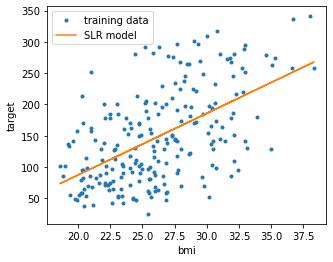

In [266]:
# visulalize the learned model
plt.figure(figsize = [5, 4])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, slr.intercept_ + slr.coef_[0] * X_train, '-', label = 'SLR model')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) of `sklearn.linear_model.LinearRegression()`. Explain the meaning of the parameters `fit_intercept`, the method `fit()`, and the attributes `coef_` and `intercept_`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

- fit_intercept: Is a boolean parameter that will or won't calculate the intercept in this model.
- fit(X, y, sample_weight): Fit linear model according to the training data (X), target values (y), and individual weights (Sample_weight).
- coef_: Estimated coefficients for linear regression problem.
- intercept_: Independent term in the linear model.

### Evaluate the model with testing set

Similarly, the SLR model built with `scikit-learn` offers the `predict()` method to make predictions on new data. `scikit-learn` also provides a series of build-in [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) for evaluation purpose.

In [267]:
# use the learned model to make predictions on the test set
y_pred = slr.predict(X_test.reshape(-1, 1))

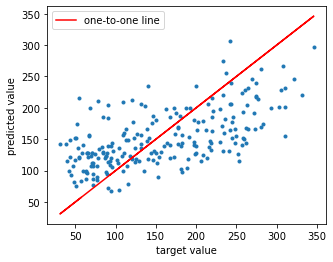

In [268]:
# visualize the predictions
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.')
plt.plot(y_test, y_test, 'r-', label = 'one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

In [269]:
# calculate mse
mse_test = mean_squared_error(y_test, y_pred, squared = True)
print("The MSE on the testing dataset is:", mse_test)

The MSE on the testing dataset is: 3878.729958668523


In [270]:
# calculate rmse
rmse_test = mean_squared_error(y_test, y_pred, squared = False)
print("The RMSE on the testing dataset is:", rmse_test)

The RMSE on the testing dataset is: 62.279450532808355


In [271]:
# claculate r^2
r2_test = r2_score(y_test, y_pred)
print("The R2 score on the testing dataset is:", r2_test)

The R2 score on the testing dataset is: 0.37410885207201094


<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) of `sklearn.linear_model.LinearRegression()`. Explain the meaning of the method `predict()`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

<span style="color:red">**[TBC]**</span> Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) of `sklearn.metrics.mean_squared_error()`. Explain the meaning of the paramter `squared`.

<span style="color:red">**[TBC]**</span> Complete your answer here.

## Part 3. Hands-on exercise with a real-world dataset

In this exercise, we will build a regression model with the simple least regression algorithm for a real-world dataset, the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Load the California Housing Dataset
- Explore the dataset
- Pre-process the dataset
- Build the simple linear regression model
- Evaluate the learned SLR model

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [272]:
# [TBC] complete your code here with proper comments
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

<span style="color:red">**[TBC]**</span> Please explain why you chose the parameter values for the `sklearn.datasets.fetch_california_housing` function and what they do.

<span style="color:red">**[TBC]**</span> Complete your answer here.

The sklearn.datasets.fetch_california_housing function is used to load the California housing dataset, but it doesn't take parameters for specifying features or target variables directly.

### Task 2. Explore the dataset

You will explore the dataset to get a better understanding of the dataset. The final goal is to select the single input feature for building the SLR model.

<span style="color:red">**[TBC]**</span> First, create a synthetical data frame called `data_df` with both features and target.

In [273]:
# [TBC] complete your code here with proper comments
feature_df, target_df = fetch_california_housing(return_X_y= True, as_frame = True )
target_df = pd.DataFrame(target_df, columns=['MedHouseVal'])
print(target_df.head())

data_df = pd.concat([feature_df, target_df], axis = 1)
data_df

   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<span style="color:red">**[TBC]**</span> Find out how many rows there are in the dataset.

In [274]:
# [TBC] complete your code here with proper comments
print("Total numbers of Rows:",len(data_df.index))

Total numbers of Rows: 20640


<span style="color:red">**[TBC]**</span> Explain what information the number of rows in the dataset represents.

<span style="color:red">**[TBC]**</span> Complete your answer here.

- MedInc: Median Income of households in the block.
- HouseAge: Median house age in the block.
- AveRooms: Average rooms per household.
- AveBedrms: Average bedrooms per household.
- Population: Block population.
- AveOccup: Average household occupancy.
- Latitude: Block latitude.
- Longitude: Block longitude.
- MedHouseVal: Median house value for California districts (the target variable), expressed in hundreds of thousands of dollars.

<span style="color:red">**[TBC]**</span> Find out how many columns there are in the dataset and and what is the name of each column.

In [275]:
# [TBC] complete your code here with proper comments
print("Total numbers of columns:",len(data_df.columns))
print("Name of each columns:",data_df.columns.values)

Total numbers of columns: 9
Name of each columns: ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedHouseVal']


<span style="color:red">**[TBC]**</span> Explain the meaning of the variables represented by each column.

<span style="color:red">**[TBC]**</span> Complete your answer here.

- MedInc (Median Income): Represents the median income of households in the block. Indicates the average income level of residents in the area.
- HouseAge (Median House Age): Represents the median age of houses in the block. Gives an idea of the overall age of housing structures in the area.
- AveRooms (Average Rooms per Household): Represents the average number of rooms per household. Provides information about the size of houses in terms of the number of rooms.
- AveBedrms (Average Bedrooms per Household): Represents the average number of bedrooms per household. Indicates the typical size of households in terms of the number of bedrooms.
- Population: Represents the total population of the block. Provides information about the population density in the area.
- AveOccup (Average Household Occupancy): Represents the average occupancy of households. Indicates how many people, on average, live in each household.
- Latitude: Represents the latitude of the block's location. Gives the geographical location in terms of north-south coordinates.
- Longitude: Represents the longitude of the block's location. Gives the geographical location in terms of east-west coordinates.
- MedHouseVal (Median House Value): Represents the median value of houses in the block. This is the target variable, indicating the typical value of houses in the area.

<span style="color:red">**[TBC]**</span> Explore the statistics for each column.

Tips:
- You can use [`pd.DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) to get descriptive statistics for each column.
- You can also use [`pd.DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist) to plot the hisrograms for each column to visualize its distribution.

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

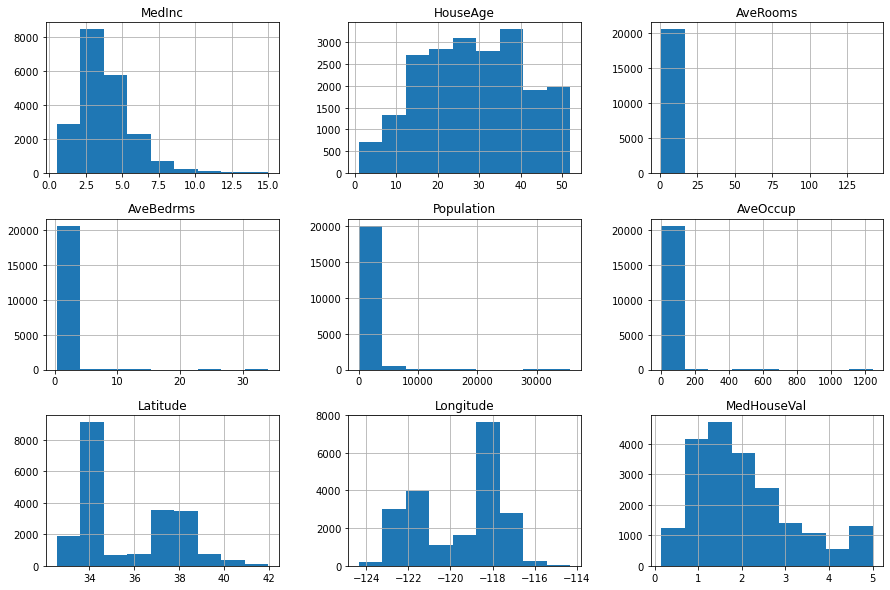

In [276]:
# [TBC] complete you code here with comments
data_df.hist(bins=9, figsize=(15,10))

In [277]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<span style="color:red">**[TBC]**</span> Describe your findings from the above descriptive statistics.

<span style="color:red">**[TBC]**</span> Complete your answer here.

<span style="color:red">**[TBC]**</span> Select a single input variable from the available features. Compare the correlations between different features and the target variable and select the feature with the strongest correlation as the input variable.

<span style="color:red">**[TBC]**</span> Which feature did you select? Write your answer here.

I selected AveRooms feature because it has the strongest correlation in the gradient map. 

In [278]:
# [TBC] complete your code here with proper comments
corr = data_df.corr()
corr.style.background_gradient(cmap = 'RdYlGn')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### Task 3. Pre-process the dataset

<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [279]:
X = data_df[[input_feature]]
y = target_df["MedHouseVal"]

In [280]:
# [TBC] complete your code here with proper comments
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=42)

In [281]:
X_train.shape, X_test.shape

((14447, 1), (6192, 1))

In [282]:
y_train.shape, y_test.shape

((14447,), (6192,))

### Task 4. Build the SLR model

<span style="color:red">**[TBC]**</span> Please complete the following steps:

- Fit the model with the training dataset
- Print the value of slope and y-intercept
- Visualize the learned model

In [283]:
# [TBC] complete your code here with proper comments
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [284]:
slope = model.coef_[0]
y_intercept = model.intercept_

In [285]:
print("slope:",slope)
print("Y-Intercept:",y_intercept)

slope: 0.4182360963689074
Y-Intercept: 0.44766421607636686


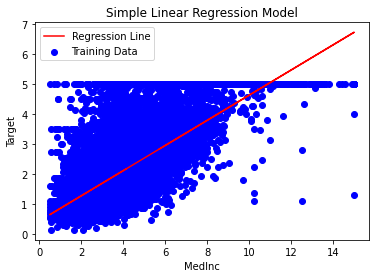

In [286]:
plt.scatter(X_train,y_train,label = "Training Data", color='blue')
plt.plot(X_train, model.predict(X_train), label='Regression Line', color='red')
plt.xlabel(input_feature)
plt.ylabel('Target')
plt.legend()
plt.title("Simple Linear Regression Model")
plt.show()

### Task 5. Evaluate the learned SLR model

<span style="color:red">**[TBC]**</span> Please complete the following steps:

- Use the learned model to make predictions on the testing dataset
- Visualize the predictions
- Calculate quantitative metrics for evaluation: MSE, RMSE, $R^2$

In [287]:
# [TBC] complete your code here with proper comments
y_pred = model.predict(X_test)

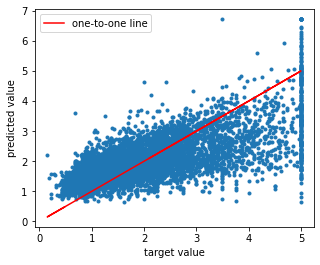

In [288]:
plt.figure(figsize = [5,4])
plt.plot(y_test,y_pred,'.')
plt.plot(y_test,y_test,'r-',label='one-to-one line')
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.legend()
plt.show()

In [289]:
mse_test = mean_squared_error(y_test,y_pred,squared = True)
rmse_test = mean_squared_error(y_test,y_pred,squared = False)
r2_test = r2_score(y_test,y_pred)

print('The MSE on the testing dataset is:',mse_test)
print('The RMSE on the testing dataset is:', rmse_test)
print('The R2 score on the testing dataset is:', r2_test)

The MSE on the testing dataset is: 0.6917998021070146
The RMSE on the testing dataset is: 0.8317450343146118
The R2 score on the testing dataset is: 0.47293054285460234


### Challenge 1. Eliminate capped data and rebuild the model

As can be seen from the result figure, the `MedHouseVal` seems to have an upper limit near 5. Check the descriptive statictics using `pd.DataFrame.describe()`, we can find that the maximum value of `MedHouseVal` is 5.00001.

This capping may be caused by different reasons:
- Capping the values can be a way to ensure privacy, as very high values could potentially be used to identify individual properties or owners, especially if combined with other information.
- Sometimes, values are capped during the data entry process to prevent the effects of possible data collection or entry errors.

Although we don't know the specific reason, such capped data does not reflect the true situation of housing prices. 

Try to eliminate thes capped data from the dataset and rebuild the SLR model. Evaluate the new model with different metrics, Can you get a better model? Different metrics may give you different conclusions.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

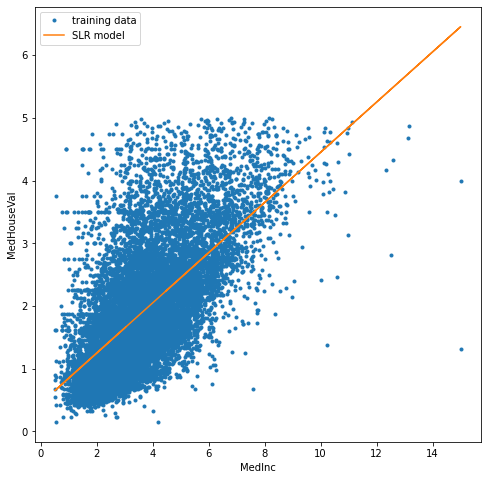

In [290]:
# [TBC] complete your code here with proper comments
cap_value = 5.0000
capped_data_mask = data_df['MedHouseVal'] >= cap_value
data_df_uncapped = data_df[~capped_data_mask]
data_df_uncapped.head()
X = data_df_uncapped['MedInc'].values  # Predictor variable
y = data_df_uncapped['MedHouseVal'].values  # Response variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
slr = LinearRegression(fit_intercept=True)
slr.fit(X_train.reshape(-1, 1), y_train)
plt.figure(figsize = [8, 8])
plt.plot(X_train, y_train, '.', label = 'training data')
plt.plot(X_train, slr.intercept_ + slr.coef_[0] * X_train, '-', label = 'SLR model')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()


### Challenge 2. Build two SLR models for the two types of block groups.

As discussed above, for block groups with few households and many empty houses, such as vacation resorts, the values of `AveRooms`, `AveBedrms`, and `AveOccup` can be surprisingly large.

House prices in such block groups may be affected by different factors than those in regular block groups.

Therefore, we want to split the dataset into two parts according to the types of block groups: one part for the block groups with few households and many empty houses, another part for the rest.

We can try to build two SLR models for each to see if we can get better prediction models. To be note, for the block groups with few households and many empty houses, the `MedInc` may not be the best input feature.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

In [291]:
# [TBC] complete your code here with proper comments
high_ave_rooms = 6
high_ave_bedrms = 2
low_ave_occup = 3
subset1 = data_df[(data_df['AveRooms'] > high_ave_rooms) & (data_df['AveBedrms'] > high_ave_bedrms) & (data_df['AveOccup'] < low_ave_occup)]
subset2 = data_df[~((data_df['AveRooms'] > high_ave_rooms) & (data_df['AveBedrms'] > high_ave_bedrms) & (data_df['AveOccup'] < low_ave_occup))]
def train_evaluate_slr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2
model1, mse1, r21 = train_evaluate_slr(subset1['MedInc'], subset1['MedHouseVal'])
print("Subset 1 - Few Households, Many Empty Houses")
print("Mean Squared Error:", mse1)
print("R-squared:", r21)
model2, mse2, r22 = train_evaluate_slr(subset2['MedInc'], subset2['MedHouseVal'])
print("\nSubset 2 - Regular Block Groups")
print("Mean Squared Error:", mse2)
print("R-squared:", r22)

Subset 1 - Few Households, Many Empty Houses
Mean Squared Error: 0.6343358841391942
R-squared: 0.1851284103711407

Subset 2 - Regular Block Groups
Mean Squared Error: 0.7064059550009026
R-squared: 0.47501148006883953
